In [1]:
import pandas as pd
import albumentations as A
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
tf.config.optimizer.set_jit(False)  # Desativa XLA

2024-10-01 16:55:24.530644: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-01 16:55:24.546186: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-01 16:55:24.550098: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-01 16:55:24.559947: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-01 16:55:25.438410: W tensorflow/compiler/tf2

In [2]:
from segmentandoDatasets import segmentando_datasets

segmentando_datasets()

DataFrame do local PUC salvo como: Datasets_csv/df_PUC.csv
DataFrame do local PUC:
                                      caminho_imagem    classe
0  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
1  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
2  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
3  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty
4  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty


DataFrame do local UFPR04 salvo como: Datasets_csv/df_UFPR04.csv
DataFrame do local UFPR04:
                                      caminho_imagem    classe
0  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...  Occupied
1  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...  Occupied
2  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...  Occupied
3  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...     Empty
4  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...  Occupied


DataFrame do local UFPR05 salvo como: Datasets_csv/df_UFPR05.csv


(                                           caminho_imagem    classe
 0       /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
 1       /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
 2       /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
 3       /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty
 4       /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty
 ...                                                   ...       ...
 388453  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
 388454  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
 388455  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty
 388456  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty
 388457  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
 
 [388458 rows x 2 columns],
                                           caminho_imagem    classe
 0      /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...  Occupied
 1    

In [3]:
from Preprocessamento import preprocessamento, preprocessamento_dataframe

In [4]:
treino_gerador, validacao_gerador, teste_gerador, treino, validacao, teste = preprocessamento("Datasets_csv/df_PUC.csv", autoencoder=True)

Found 233074 validated image filenames.
Found 77692 validated image filenames.
Found 77692 validated image filenames.


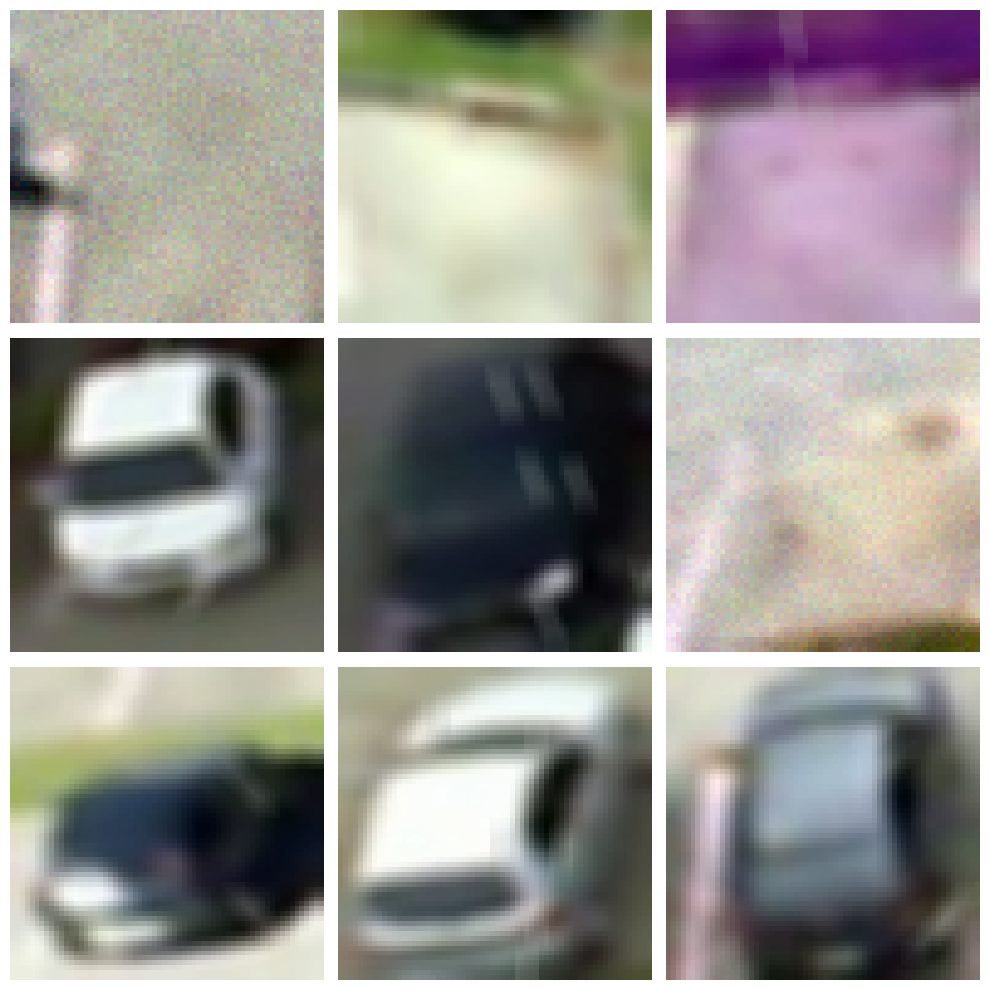

<Figure size 640x480 with 0 Axes>

In [5]:
from visualizacao import plot_imagens_dataframe_gerador

plot_imagens_dataframe_gerador(treino_gerador)

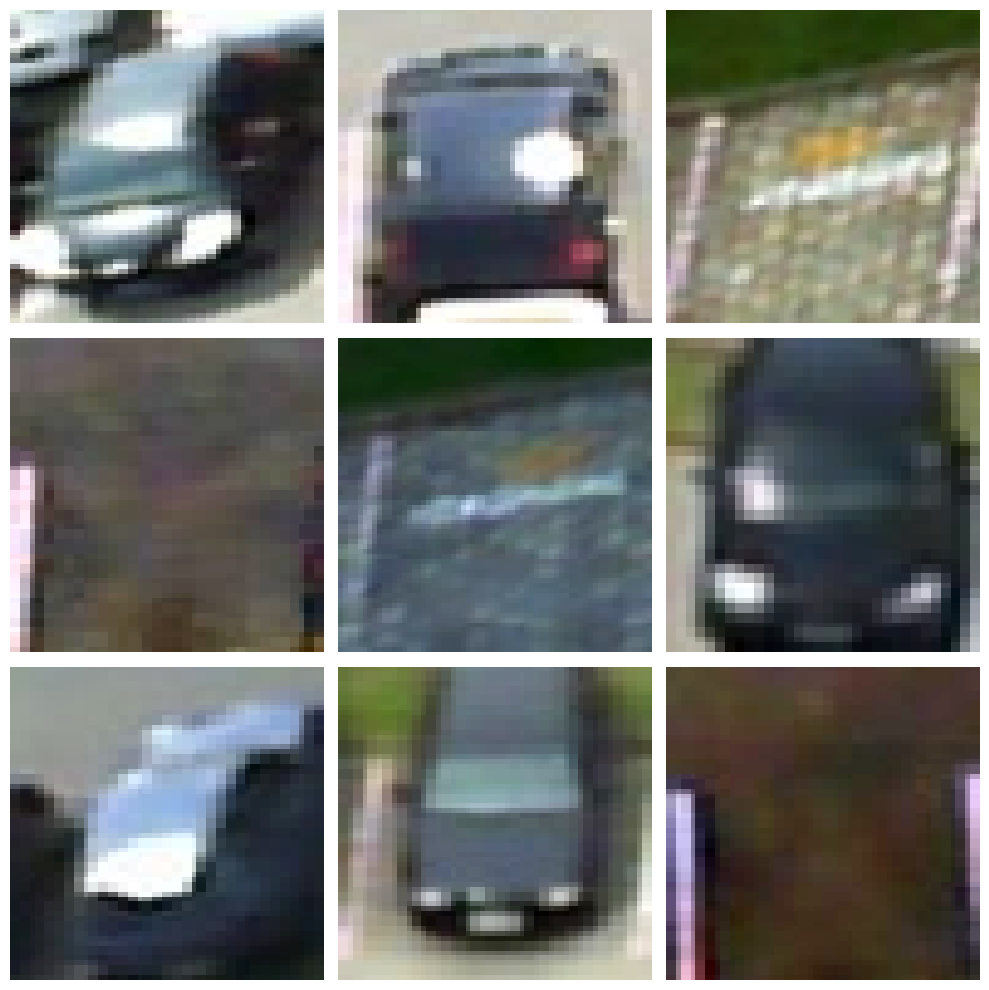

<Figure size 640x480 with 0 Axes>

In [6]:
plot_imagens_dataframe_gerador(teste_gerador)

In [7]:
from Modelos import Autoencoder 

autoencoder = Autoencoder()

modelo = autoencoder.model

/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
I0000 00:00:1727812537.291790   97196 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727812537.324220   97196 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727812537.324378   97196 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at http

In [8]:
modelo.summary()
modelo.compile(optimizer='adam', loss='mse')

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder (Sequential)            │ (None, 4, 4, 128)      │        97,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Sequential)            │ (None, 64, 64, 3)      │       244,899 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 342,339 (1.31 MB)

 Trainable params: 342,339 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = modelo.fit(treino_gerador, epochs=50, batch_size=16, validation_data=(validacao_gerador))

Epoch 1/50


/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1727812541.110486   97295 service.cc:146] XLA service 0xa616550 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727812541.110524   97295 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1660, Compute Capability 7.5
2024-10-01 16:55:41.154911: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-01 16:55:41.366701: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


   4/7284 ━━━━━━━━━━━━━━━━━━━━ 4:43 39ms/step - loss: 0.0357  

I0000 00:00:1727812544.041099   97295 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7284/7284 ━━━━━━━━━━━━━━━━━━━━ 1104s 151ms/step - loss: 0.0033 - val_loss: 5.1148e-04
Epoch 2/50
7284/7284 ━━━━━━━━━━━━━━━━━━━━ 158s 22ms/step - loss: 4.9352e-04 - val_loss: 3.8127e-04
Epoch 3/50
7284/7284 ━━━━━━━━━━━━━━━━━━━━ 158s 22ms/step - loss: 3.8927e-04 - val_loss: 3.5384e-04
Epoch 4/50
7284/7284 ━━━━━━━━━━━━━━━━━━━━ 158s 22ms/step - loss: 3.3397e-04 - val_loss: 3.2567e-04
Epoch 5/50
7284/7284 ━━━━━━━━━━━━━━━━━━━━ 158s 22ms/step - loss: 3.0146e-04 - val_loss: 2.8345e-04
Epoch 6/50
7284/7284 ━━━━━━━━━━━━━━━━━━━━ 158s 22ms/step - loss: 2.8263e-04 - val_loss: 2.5044e-04
Epoch 7/50
7284/7284 ━━━━━━━━━━━━━━━━━━━━ 158s 22ms/step - loss: 2.6788e-04 - val_loss: 2.6733e-04
Epoch 8/50
7284/7284 ━━━━━━━━━━━━━━━━━━━━ 157s 22ms/step - loss: 2.5689e-04 - val_loss: 2.4801e-04
Epoch 9/50
7284/7284 ━━━━━━━━━━━━━━━━━━━━ 158s 22ms/step - loss: 2.4810e-04 - val_loss: 2.5003e-04
Epoch 10/50
7284/7284 ━━━━━━━━━━━━━━━━━━━━ 158s 22ms/step - loss: 2.3912e-04 - val_loss: 2.2590e-04
Epoch 11/50
7284/7284 

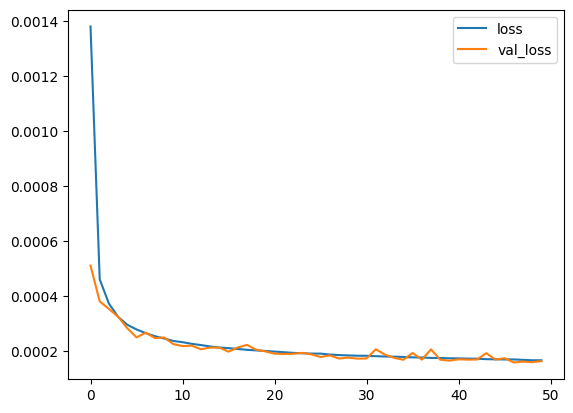

In [10]:
pd.DataFrame(history.history).plot()
modelo.save("Modelos_keras/Baseline.keras")
modelo.save_weights("weights_finais/Baseline.weights.h5")

In [11]:
modelo.load_weights("weights_finais/Baseline.weights.h5")

In [12]:
x_batch, y_batch = next(treino_gerador)
print(x_batch.shape, y_batch.shape)

print(y_batch)

print(treino_gerador.image_shape)
print(validacao_gerador.image_shape)

(32, 64, 64, 3) (32, 64, 64, 3)
[[[[0.5764706  0.53333336 0.52156866]
   [0.57254905 0.53333336 0.5176471 ]
   [0.5686275  0.53333336 0.5137255 ]
   ...
   [0.58431375 0.5647059  0.5058824 ]
   [0.5803922  0.56078434 0.5019608 ]
   [0.5803922  0.56078434 0.5019608 ]]

  [[0.5686275  0.53333336 0.5176471 ]
   [0.5686275  0.53333336 0.5176471 ]
   [0.5647059  0.5254902  0.5137255 ]
   ...
   [0.5647059  0.54509807 0.49019608]
   [0.56078434 0.54509807 0.48235294]
   [0.56078434 0.54509807 0.48235294]]

  [[0.5647059  0.5372549  0.5176471 ]
   [0.5647059  0.5372549  0.5137255 ]
   [0.56078434 0.53333336 0.5137255 ]
   ...
   [0.52156866 0.5058824  0.44313726]
   [0.5176471  0.5058824  0.44313726]
   [0.5137255  0.5019608  0.4392157 ]]

  ...

  [[0.5764706  0.5568628  0.52156866]
   [0.5803922  0.56078434 0.5254902 ]
   [0.58431375 0.5647059  0.5294118 ]
   ...
   [0.6039216  0.5921569  0.5529412 ]
   [0.6        0.5882353  0.54901963]
   [0.6        0.58431375 0.54509807]]

  [[0.5686275

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


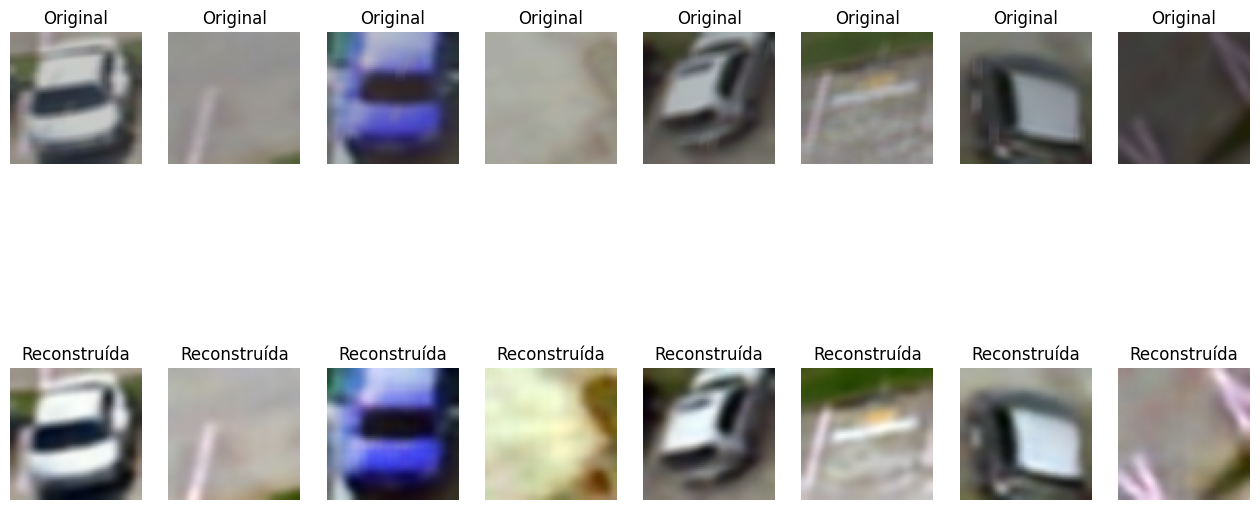

In [13]:
from visualizacao import plot_autoencoder

plot_autoencoder(x_batch, modelo)

In [14]:
from Modelos import Classificador

modelo2 = Classificador("weights_finais/Baseline.weights.h5")

Pesos carregados com sucesso


/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv_transpose.py:94: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:591: UserWarning: A total of 2 objects could not be loaded. Example error message for object <Dense name=dense, built=True>:

Layer 'dense' expected 2 variables, but received 0 variables during loading. Expected: ['kernel', 'bias']

List of objects that could not be loaded:
[<Dense name=dense, 

In [15]:
treino_gerador, validacao_gerador, _, _, _, _ = preprocessamento("Datasets_csv/df_PUC.csv", autoencoder=False)

Found 233074 validated image filenames belonging to 2 classes.
Found 77692 validated image filenames belonging to 2 classes.
Found 77692 validated image filenames belonging to 2 classes.


In [16]:
classificador = modelo2.model

history = classificador.fit(treino_gerador, epochs=20, batch_size=32 ,validation_data=validacao_gerador)

Epoch 1/20


/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7284/7284 ━━━━━━━━━━━━━━━━━━━━ 156s 21ms/step - accuracy: 0.9862 - loss: 0.0646 - val_accuracy: 0.9977 - val_loss: 0.0108
Epoch 2/20
7284/7284 ━━━━━━━━━━━━━━━━━━━━ 152s 21ms/step - accuracy: 0.9955 - loss: 0.0159 - val_accuracy: 0.9977 - val_loss: 0.0108
Epoch 3/20
7284/7284 ━━━━━━━━━━━━━━━━━━━━ 151s 21ms/step - accuracy: 0.9961 - loss: 0.0148 - val_accuracy: 0.9981 - val_loss: 0.0104
Epoch 4/20
7284/7284 ━━━━━━━━━━━━━━━━━━━━ 152s 21ms/step - accuracy: 0.9965 - loss: 0.0137 - val_accuracy: 0.9983 - val_loss: 0.0090
Epoch 5/20
7284/7284 ━━━━━━━━━━━━━━━━━━━━ 151s 21ms/step - accuracy: 0.9968 - loss: 0.0128 - val_accuracy: 0.9982 - val_loss: 0.0085
Epoch 6/20
7284/7284 ━━━━━━━━━━━━━━━━━━━━ 152s 21ms/step - accuracy: 0.9969 - loss: 0.0122 - val_accuracy: 0.9982 - val_loss: 0.0086
Epoch 7/20
7284/7284 ━━━━━━━━━━━━━━━━━━━━ 152s 21ms/step - accuracy: 0.9969 - loss: 0.0131 - val_accuracy: 0.9982 - val_loss: 0.0087
Epoch 8/20
7284/7284 ━━━━━━━━━━━━━━━━━━━━ 151s 21ms/step - accuracy: 0.9972 - lo

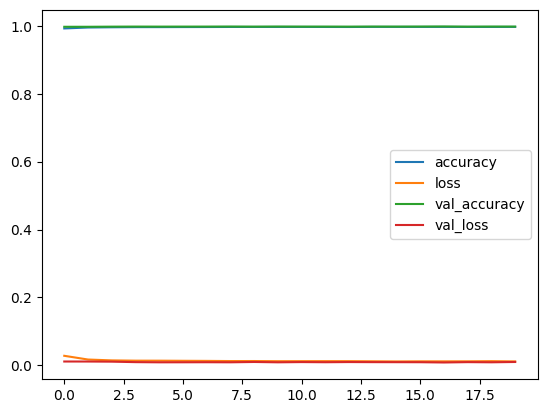

In [17]:
pd.DataFrame(history.history).plot()

classificador.save("/home/lucas/PIBIC (copy)/Modelos_keras/Classificador_Baseline.keras")
classificador.save_weights("/home/lucas/PIBIC (copy)/Modelos_keras/Classificador_Baseline.weights.h5")

In [18]:
import numpy as np

predicoes = classificador.predict(teste_gerador)
predicoes = np.argmax(predicoes, axis=1)

from preprocessamento import mapear_rotulos_binarios

y_verdadeiro = mapear_rotulos_binarios(teste['classe'])

/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2428/2428 ━━━━━━━━━━━━━━━━━━━━ 261s 107ms/step


In [19]:
from visualizacao import plot_confusion_matrix

plot_confusion_matrix(y_verdadeiro, predicoes, ['Empty', 'Occupied'], "/home/lucas/PIBIC (copy)/Resultados/Matriz_de_confusao/Autoencoder/Autoencoder_PUC", 'PUC')

In [20]:
UFPR04, UFPR04_df = preprocessamento_dataframe('Datasets_csv/df_UFPR04.csv')
UFPR05, UFPR05_df = preprocessamento_dataframe('Datasets_csv/df_UFPR05.csv')

x_UFPR04, _ = next(UFPR04)
x_UFPR05, _ = next(UFPR05)

Found 92250 validated image filenames belonging to 2 classes.
Found 136718 validated image filenames belonging to 2 classes.


In [21]:
predicoes_UFPR04 = classificador.predict(UFPR04)
predicoes_UFPR05 = classificador.predict(UFPR05)

predicoes_UFPR04 = np.argmax(predicoes_UFPR04, axis=1)
predicoes_UFPR05 = np.argmax(predicoes_UFPR05, axis=1)

y_UFPR04 = mapear_rotulos_binarios(UFPR04_df['classe'])
y_UFPR05 = mapear_rotulos_binarios(UFPR05_df['classe'])

plot_confusion_matrix(y_UFPR04, predicoes_UFPR04, ['Empty', 'Occupied'], "/home/lucas/PIBIC (copy)/Resultados/Matriz_de_confusao/Autoencoder/Autoencoder_UFPR04", 'UFPR04')
plot_confusion_matrix(y_UFPR05, predicoes_UFPR05, ['Empty', 'Occupied'], "/home/lucas/PIBIC (copy)/Resultados/Matriz_de_confusao/Autoencoder/Autoencoder_UFPR05", 'UFPR05')

/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2883/2883 ━━━━━━━━━━━━━━━━━━━━ 323s 112ms/step
4273/4273 ━━━━━━━━━━━━━━━━━━━━ 492s 115ms/step
